# Problem Statement

Predicting the chance of admission based on the various entrance exam scores of students.

In [1]:
# Importing the necessary libraries.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

import pickle 
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/s4sauravv/Datasets/main/Admission_Prediction.csv")

In [3]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
1,2,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,3,NaN,104.0,3.0,3.0,3.5,8.00,1,0.72
3,4,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80
4,5,314.0,103.0,2.0,2.0,3.0,8.21,0,0.65


Features or Independent Data

* GRE Score
* TOEFL Score
* University Rating
* SOP
* LOR
* CGPA
* Research

Target or Dependent Data

* Chance of Admit

In [4]:
data.shape

(500, 9)

In [5]:
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,485.000000,490.000000,485.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.558763,107.187755,3.121649,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.274704,6.112899,1.146160,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [6]:
data.isnull().sum()

Serial No.            0
GRE Score            15
TOEFL Score          10
University Rating    15
SOP                   0
LOR                   0
CGPA                  0
Research              0
Chance of Admit       0
dtype: int64

In [7]:
# Filling the null values

data['GRE Score'] = data['GRE Score'].fillna(data['GRE Score'].mean())
data['TOEFL Score'] = data['TOEFL Score'].fillna(data['TOEFL Score'].mean())
data['University Rating'] = data['University Rating'].fillna(data['University Rating'].mode()[0])

In [8]:
data.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [9]:
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.558763,107.187755,3.118000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.103952,6.051338,1.128993,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,309.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,316.558763,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,324.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [10]:
# Droping the Serial No. column we don't need that.
data = data.drop(columns=['Serial No.'])

In [11]:
data

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337.000000,118.0,4.0,4.5,4.5,9.65,1,0.92
1,324.000000,107.0,4.0,4.0,4.5,8.87,1,0.76
2,316.558763,104.0,3.0,3.0,3.5,8.00,1,0.72
3,322.000000,110.0,3.0,3.5,2.5,8.67,1,0.80
4,314.000000,103.0,2.0,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332.000000,108.0,5.0,4.5,4.0,9.02,1,0.87
496,337.000000,117.0,5.0,5.0,5.0,9.87,1,0.96
497,330.000000,120.0,5.0,4.5,5.0,9.56,1,0.93
498,312.000000,103.0,4.0,4.0,5.0,8.43,0,0.73


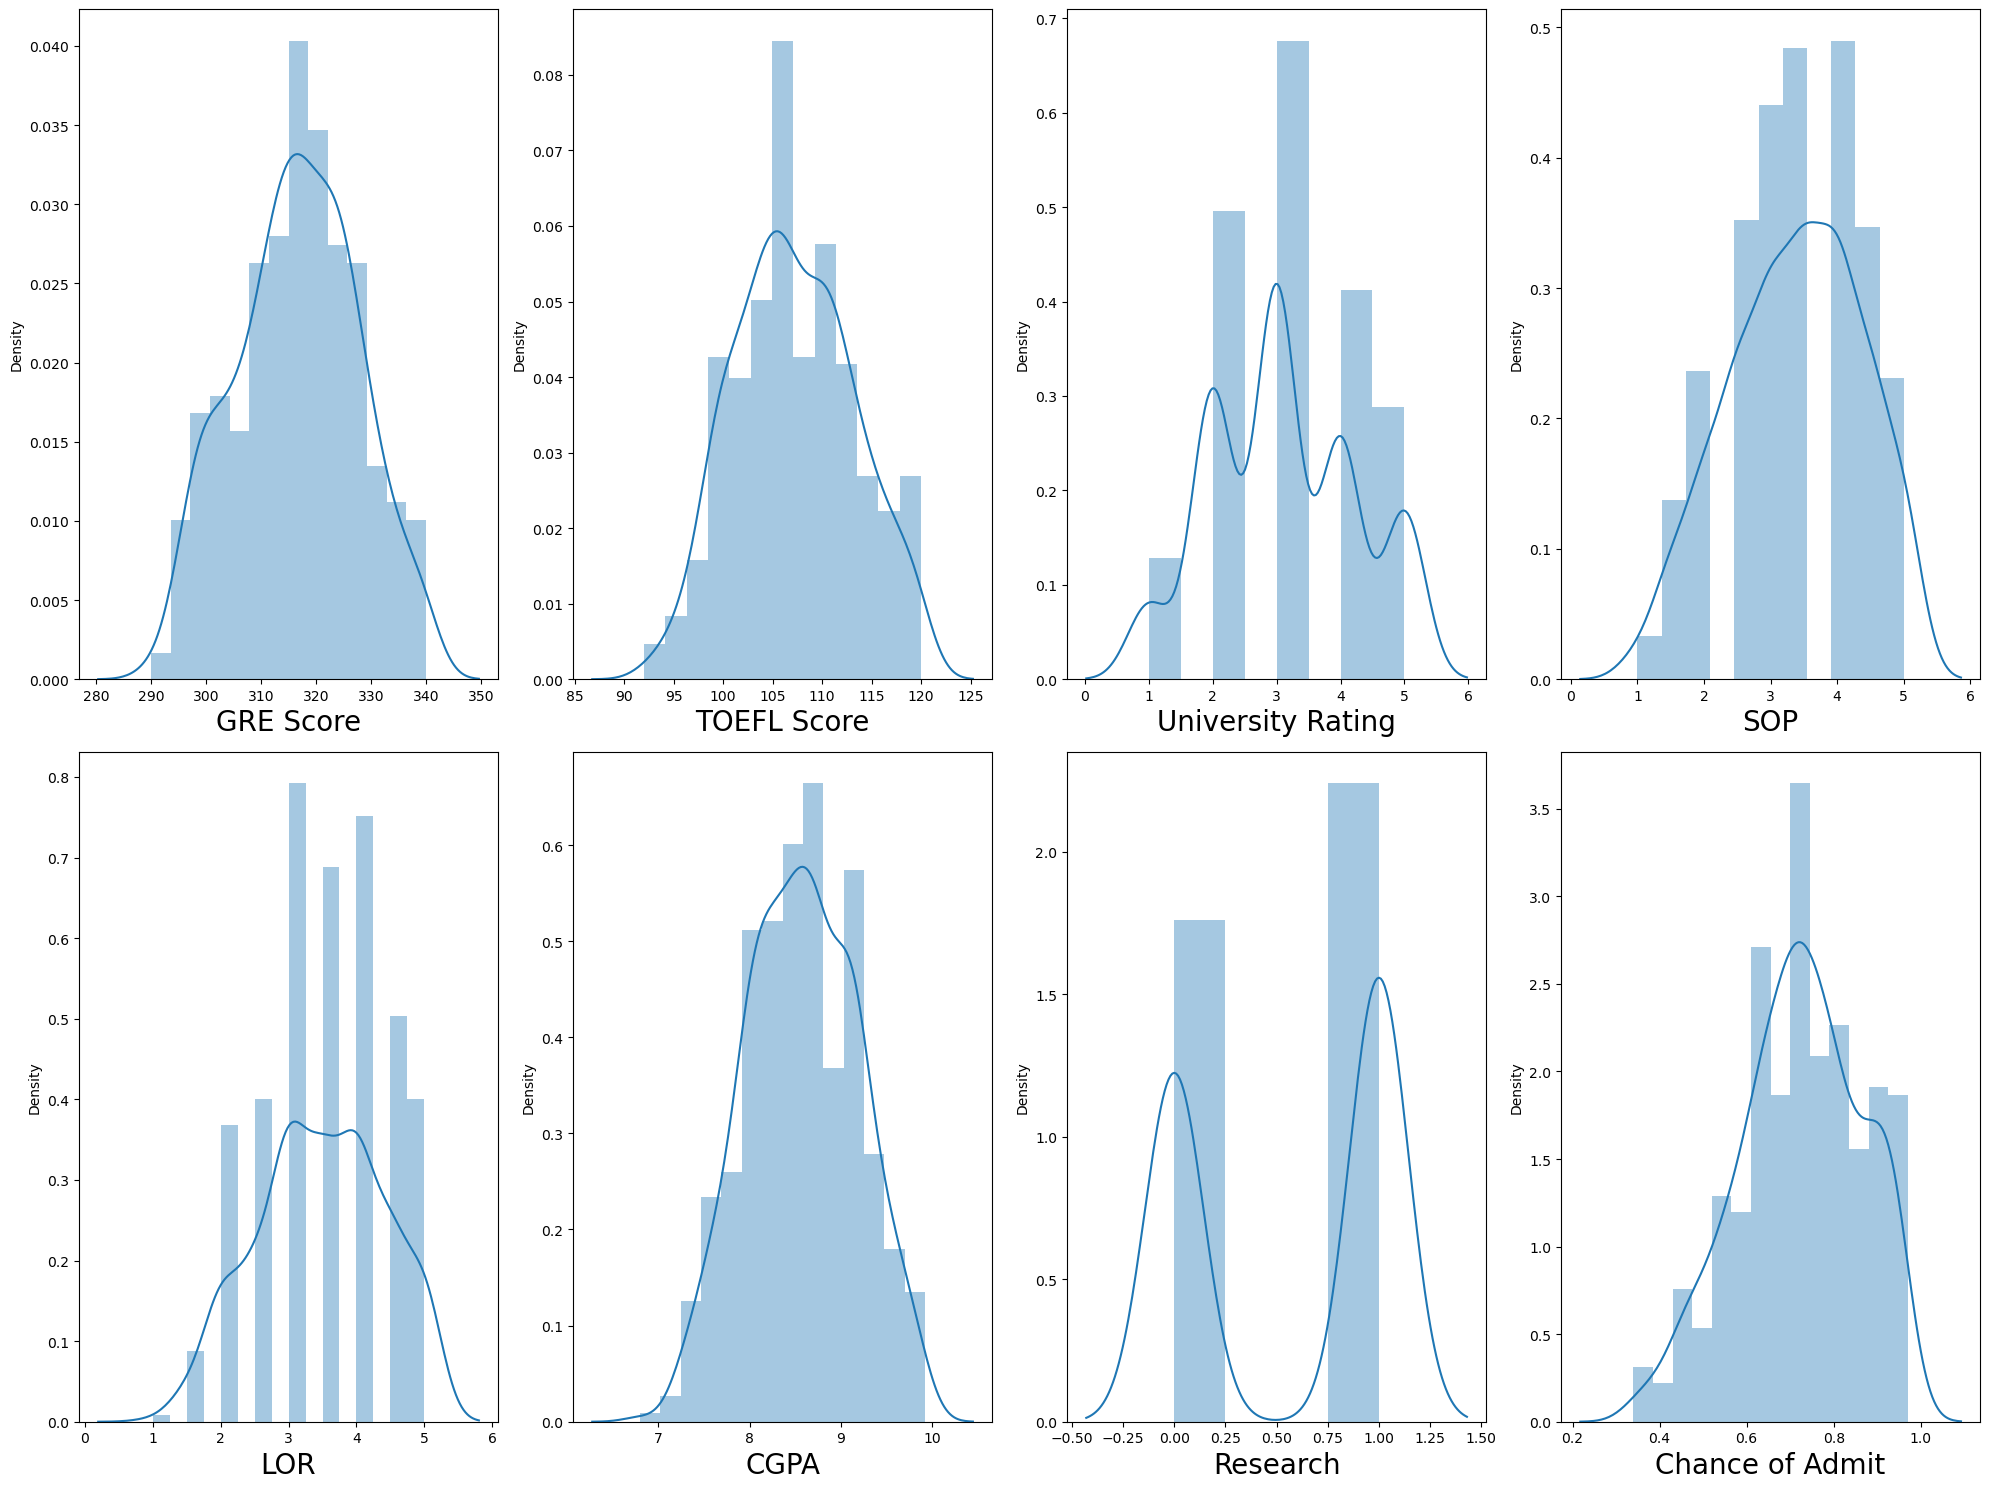

In [12]:
# Checking the data distribution for any skewness

plt.figure(figsize=(20,15))
plotnumber=1
for column in data:
    if plotnumber<=8:
        ax=plt.subplot(2,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column, fontsize=20)
    plotnumber+=1
plt.tight_layout()

The data distribution is good enough.

In [13]:
# Divide the data into Feature and Label column

x = data.drop(columns=['Chance of Admit'])
y = data['Chance of Admit']

In [14]:
x

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337.000000,118.0,4.0,4.5,4.5,9.65,1
1,324.000000,107.0,4.0,4.0,4.5,8.87,1
2,316.558763,104.0,3.0,3.0,3.5,8.00,1
3,322.000000,110.0,3.0,3.5,2.5,8.67,1
4,314.000000,103.0,2.0,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
495,332.000000,108.0,5.0,4.5,4.0,9.02,1
496,337.000000,117.0,5.0,5.0,5.0,9.87,1
497,330.000000,120.0,5.0,4.5,5.0,9.56,1
498,312.000000,103.0,4.0,4.0,5.0,8.43,0


In [15]:
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
495    0.87
496    0.96
497    0.93
498    0.73
499    0.84
Name: Chance of Admit, Length: 500, dtype: float64

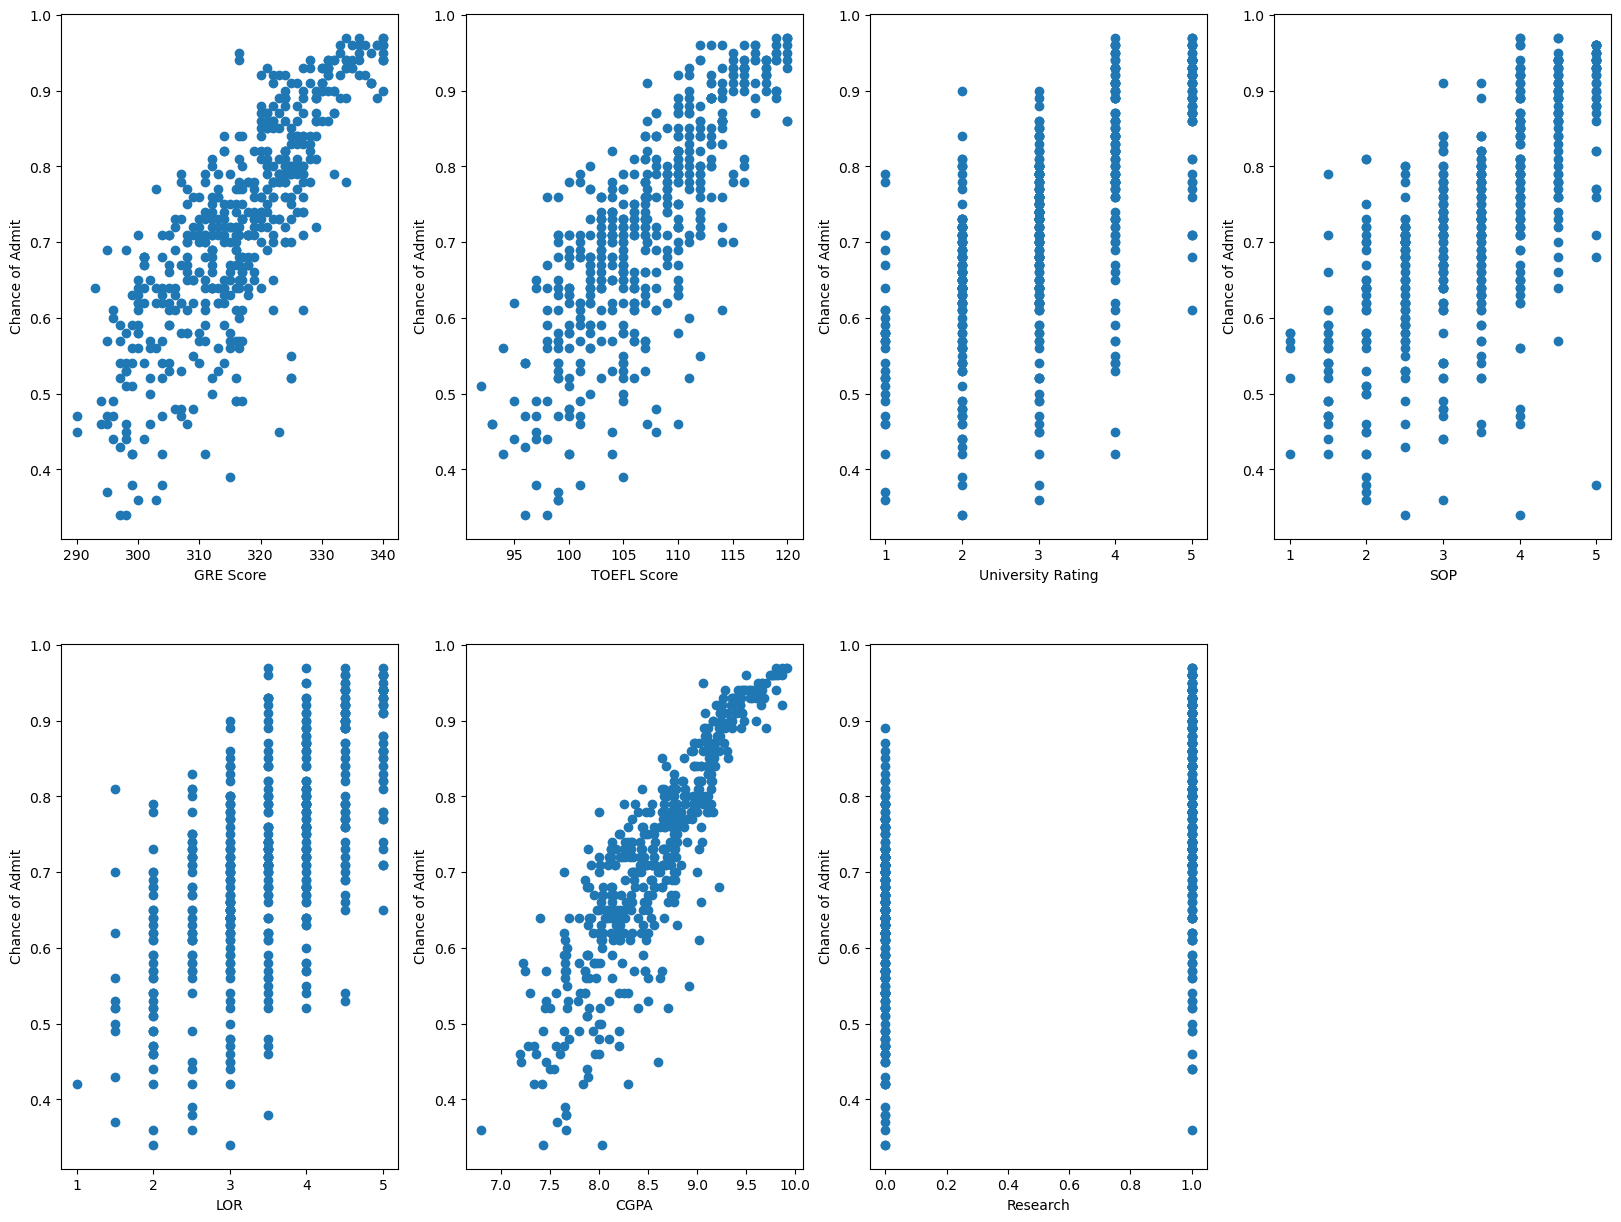

In [16]:
#Visualizing  relationship

plt.figure(figsize=(20,15))
plotnumber = 1
for column in x:
    if plotnumber <= 8:
        ax=plt.subplot(2,4,plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column , fontsize=10)
        plt.ylabel('Chance of Admit',fontsize=10)
    plotnumber +=1
plt.show()

In [17]:
# Data Scaling

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [18]:
x_scaled

array([[ 1.84274116e+00,  1.78854223e+00,  7.82009548e-01, ...,
         1.09894429e+00,  1.77680627e+00,  8.86405260e-01],
       [ 6.70814288e-01, -3.10581135e-02,  7.82009548e-01, ...,
         1.09894429e+00,  4.85859428e-01,  8.86405260e-01],
       [ 5.12433309e-15, -5.27312752e-01, -1.04622593e-01, ...,
         1.73062093e-02, -9.54042814e-01,  8.86405260e-01],
       ...,
       [ 1.21170361e+00,  2.11937866e+00,  1.66864169e+00, ...,
         1.63976333e+00,  1.62785086e+00,  8.86405260e-01],
       [-4.10964364e-01, -6.92730965e-01,  7.82009548e-01, ...,
         1.63976333e+00, -2.42366993e-01, -1.12815215e+00],
       [ 9.41258951e-01,  9.61451165e-01,  7.82009548e-01, ...,
         1.09894429e+00,  7.67219636e-01, -1.12815215e+00]])

In [19]:
# Splitting the data into trainig and testing data

x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.25,random_state=42)

In [20]:
# Model Training

lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [21]:
data.tail()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
495,332.0,108.0,5.0,4.5,4.0,9.02,1,0.87
496,337.0,117.0,5.0,5.0,5.0,9.87,1,0.96
497,330.0,120.0,5.0,4.5,5.0,9.56,1,0.93
498,312.0,103.0,4.0,4.0,5.0,8.43,0,0.73
499,327.0,113.0,4.0,4.5,4.5,9.04,0,0.84


In [22]:
print('Chance of Admission is: ',lr.predict(scaler.transform([[312.0,103.0,4.0,4.0,5.0,8.43,0]])))

Chance of Admission is:  [0.69549228]


In [23]:
y_pred = lr.predict(x_test)
y_pred

array([0.91672616, 0.79942231, 0.56537979, 0.71862135, 0.8175083 ,
       0.86211708, 0.47703811, 0.68387279, 0.82887511, 0.80907627,
       0.71810694, 0.72660196, 0.64934137, 0.93415008, 0.82748891,
       0.51040402, 0.83525243, 0.59940765, 0.53462827, 0.57206316,
       0.66614056, 0.55142244, 0.72357103, 0.79269463, 0.77908602,
       0.60610011, 0.95192416, 0.84668915, 0.62499053, 0.74517829,
       0.55420619, 0.7304802 , 0.54296781, 0.86424788, 0.65376644,
       0.73670757, 0.55500483, 0.9287975 , 0.64603766, 0.71146422,
       0.969428  , 0.57490522, 0.69110891, 0.85847298, 0.93998053,
       0.57952146, 0.95980988, 0.83805971, 0.79556134, 0.92836647,
       0.8920795 , 0.59797278, 0.70562358, 0.52141272, 0.95384125,
       0.58675825, 0.958073  , 0.73934295, 0.66769138, 0.50076826,
       0.63491504, 0.68223864, 0.59945475, 0.58819371, 0.43823095,
       0.58443491, 0.86932829, 0.89844722, 0.65768374, 0.70561723,
       0.61866988, 0.78440334, 0.68827935, 0.55834194, 0.55571

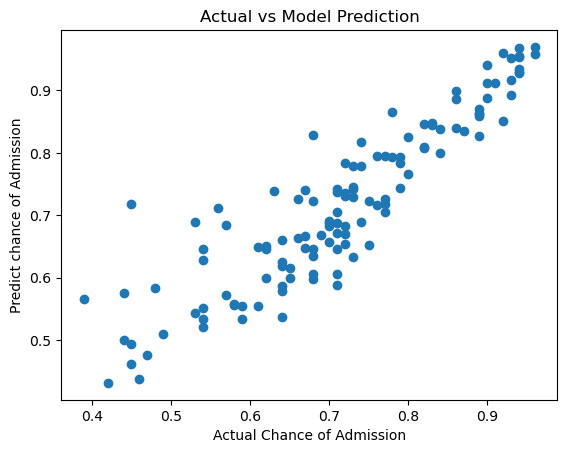

In [24]:
# Comparing the predicted data with the actual data
plt.scatter(y_test,y_pred)
plt.xlabel('Actual Chance of Admission')
plt.ylabel('Predict chance of Admission')
plt.title('Actual vs Model Prediction')
plt.show()

In [25]:
# Accuracy score
print("Model Training Score : ",lr.score(x_train,y_train))
print("Model Testing Score : ",lr.score(x_test,y_test))

Model Training Score :  0.8205681087702014
Model Testing Score :  0.8175156689543607


In [26]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [27]:
#MAE
mean_absolute_error(y_test,y_pred)

0.04286447389998466

In [28]:
#MSE
mean_squared_error(y_test,y_pred)

0.0035624141465338

In [29]:
#RMSE
np.sqrt(mean_squared_error(y_test,y_pred))

0.059685962726036344

Checking if our model is overfitted or not.

In [30]:
from sklearn.linear_model import Lasso,LassoCV

In [31]:
#LASSOCV will return best alpha(learning rate) after max iteration

lasscv = LassoCV(alphas= None, max_iter=100)
lasscv.fit(x_train,y_train)

LassoCV(max_iter=100)

In [32]:
alpha = lasscv.alpha_
alpha

0.0010042013847505083

In [33]:
#Now that we have best parameter,Lets use Lasso regression and see how well our data has fitted before
lasso_reg=Lasso(alpha)
lasso_reg.fit(x_train,y_train)

Lasso(alpha=0.0010042013847505083)

In [34]:
lasso_reg.score(x_test,y_test)

0.8180206110476538

We can see that we are getting the same score so our model is not overfitted.

In [35]:
pickle.dump(lr,open('AdmissionPrediction_file','wb'))

In [36]:
lr_model = pickle.load(open('AdmissionPrediction_file','rb'))

In [37]:
lr_model.predict(scaler.transform([[327.0,113.0,4.0,4.5,4.5,9.04,0]]))

array([0.82385508])